## EDA

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
from scipy import stats
import datetime 
import plotly.express as px
import seaborn as sns
import dvc.api
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sns.set()
%matplotlib inline
from sklearn import preprocessing
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [8]:
#Adding scripts path
import sys, os
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from data_preprocessing import data_preProcessing_script
from plot import exploration
from cleaner import DataCleaner

In [4]:
store_data = pd.read_csv('../data/store.csv')
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

# loading the joined dataset
train_store = pd.read_csv('../data/train_store.csv')
test_store = pd.read_csv('../data/test_store.csv')

In [3]:
# Get URL from DVC
train_store = 'data/train_store.csv'
test_store = 'data/test_store.csv'
repo = 'https://github.com/HenokD11/SalesPrediction'
version = '8a89e3b46e60a61e908a32e6235255fc'

In [4]:
train_store

'data/train_store.csv'

In [9]:
# Load train data from dvc using the dvc.api.Dataset class
train_data_url = dvc.api.get_url(
    path=train_store,
    repo=repo,
    rev=version
)

In [ ]:
# Load data from dvc using the dvc.api.Dataset class
test_data_url = dvc.api.get_url(
    path=test_store,
    repo=repo,
    rev=version
)

In [5]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [6]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


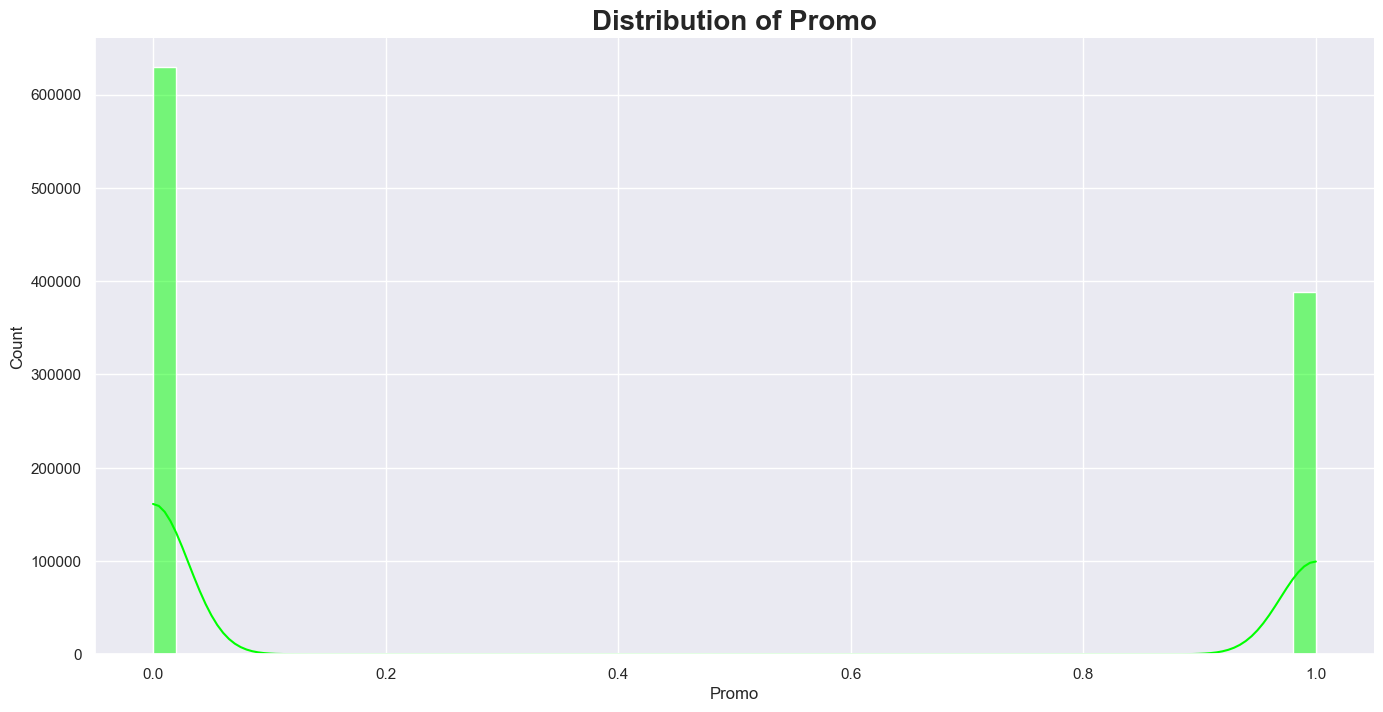

In [9]:
exploration.plot_hist(train_data, 'Promo', 'lime')